<a href="https://colab.research.google.com/github/nit-1418/Deep_learning/blob/main/MLP_in_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP in MNIST dataset

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
# load dataset
(x_train,y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts = True)
print("Train labels: ", dict(zip(unique,  counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [ ]:
# count the number of unique teest labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [ ]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size = 25)
images = x_train[indexes]
labels = y_train[indexes]

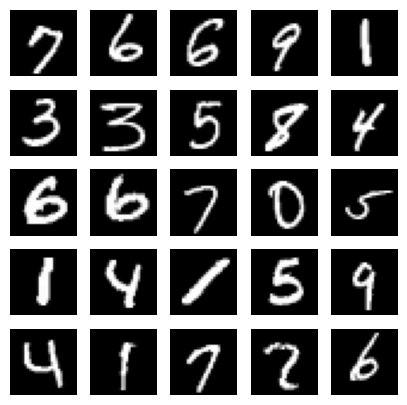

In [ ]:
# plot the 25 mnist digits
plt.figure(figsize= (5,5))
for i in range(len(indexes)):
  plt.subplot(5, 5, i+1)
  image = images[i]
  plt.imshow (image, cmap = 'gray')
  plt.axis("off")

In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))
print(num_labels)

10


In [ ]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


to_categorical is a function typically found in machine learning libraries like TensorFlow or Keras. It's used to convert categorical integer labels into a "one-hot" encoding.

Here's what it does step by step:

1. It takes a list or array of categorical labels (e.g., [0, 1, 2, 3]).
2. It converts each label into a binary vector of length equal to the number of classes.
3. Each binary vector has a 1 in the position corresponding to the label and 0s elsewhere.

For example, if you have three classes and your labels are [0, 1, 2], to_categorical would convert them as follows:

0 becomes [1, 0, 0]
1 becomes [0, 1, 0]
2 becomes [0, 0, 1]
This conversion is often necessary when training neural networks, as many classification algorithms require labels to be in this format for proper training and evaluation.

In [ ]:
# image dimension (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
print(input_size)

784


image_size = x_train.shape[1]: This line calculates the size of the images in the training dataset. Assuming the images are square, it takes the size of the second dimension of the x_train array. The assumption is that the images have equal width and height, hence shape[1] represents the width or height of the image.

input_size = image_size * image_size: This line calculates the total number of input features for each image. Since the images are assumed to be square, image_size * image_size gives the total number of pixels in each image. This will be used to determine the input size of the neural network model or to reshape the input data accordingly.

In [ ]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32')/255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32')/255

Resizing: It reshapes the input images in the training and testing datasets to have a shape of [-1, input_size]. The -1 in the reshape function indicates that the size of that dimension should be inferred based on the length of the array and the other dimensions. input_size represents the total number of features for each image, which was calculated earlier as the square of the image size.

Normalization: After reshaping, it converts the data type of the images to float32 and then divides each pixel value by 255. This step effectively scales the pixel values from the original range of [0, 255] to a normalized range of [0, 1]. Normalization is a common preprocessing step in machine learning and deep learning tasks, as it helps improve the convergence of optimization algorithms and makes the model more robust to variations in input data.

In [ ]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

Batch Size: batch_size = 128

This parameter defines the number of samples that will be propagated through the network at once during training. A smaller batch size means that fewer samples will be processed in each iteration, which can lead to slower but more stable training. A larger batch size can speed up training but may require more memory.


Hidden Units: hidden_units = 256

This parameter specifies the number of neurons or units in the hidden layer(s) of the neural network. The hidden units determine the capacity and complexity of the model to learn representations from the input data. Increasing the number of hidden units can improve the model's ability to learn intricate patterns in the data but may also increase the risk of overfitting if not regularized properly.


Dropout: dropout = 0.45

Dropout is a regularization technique commonly used in neural networks to prevent overfitting. It randomly drops a proportion of the units/neurons in the network during training to reduce co-adaptation of neurons. The dropout parameter here specifies the dropout rate, which is the probability that a neuron will be dropped out during training. In this case, 45% of the neurons will be dropped out during training, which means that each neuron has a 45% chance of being dropped out in each training iteration.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

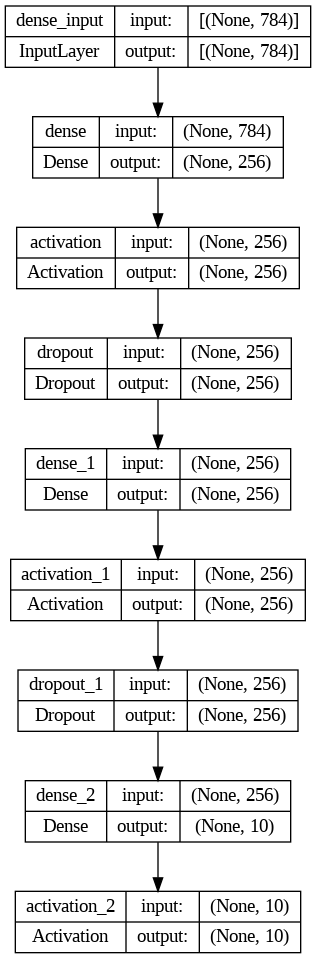

In [ ]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim = input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file = 'mlp-mnist.png', show_shapes = True)

The code defines a 3-layer Multilayer Perceptron (MLP) neural network model using the Keras Sequential API. Here's a concise summary:

1. **Input Layer**:
   - It consists of a `Dense` layer with `hidden_units` number of neurons and `input_size` input dimensions.
   - Activation function: Rectified Linear Unit (ReLU).
   - Dropout with a rate of `dropout` follows the ReLU activation.

2. **Hidden Layer**:
   - Another `Dense` layer with `hidden_units` neurons.
   - Activation function: ReLU.
   - Dropout with a rate of `dropout`.

3. **Output Layer**:
   - A `Dense` layer with `num_labels` neurons, where `num_labels` represents the number of classes in the classification task.
   - Activation function: Softmax, which is typical for multi-class classification problems. It produces probabilities for each class.

This architecture forms a fully connected feedforward neural network with dropout regularization applied after each hidden layer to prevent overfitting. The ReLU activation function is used to introduce non-linearity, while the softmax activation function in the output layer provides probabilities for each class.

In [ ]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

1. **Loss Function**:
   - The loss function is specified as `'categorical_crossentropy'`. This is a common choice for multi-class classification problems when the targets are in one-hot encoded format. It measures the difference between the true distribution (the one-hot encoded labels) and the predicted probability distribution (the output of the softmax layer).

2. **Optimizer**:
   - The optimizer used is Adam. Adam is an adaptive learning rate optimization algorithm that is widely used in training deep neural networks. It combines ideas from RMSProp and momentum.

3. **Metrics**:
   - The metric used to evaluate the performance of the model during training and testing is accuracy. Accuracy is a commonly used metric for classification tasks, as it measures the proportion of correctly classified samples out of the total number of samples.

By compiling the model with these settings, you're preparing it for training using the specified loss function, optimizer, and evaluation metric. During training, the optimizer will adjust the model's weights to minimize the categorical cross-entropy loss, while monitoring the accuracy metric to assess the model's performance.

In [ ]:
# train the network
model.fit(x_train, y_train, epochs = 20, batch_size = batch_size)

Epoch 1/20
469/469 [==============================] - 6s 10ms/step - loss: 0.4310 - accuracy: 0.8685
Epoch 2/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1965 - accuracy: 0.9427
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1488 - accuracy: 0.9560
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1277 - accuracy: 0.9613
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1165 - accuracy: 0.9643
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1005 - accuracy: 0.9695
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0956 - accuracy: 0.9701
Epoch 8/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0871 - accuracy: 0.9731
Epoch 9/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0798 - accuracy: 0.9746
Epoch 10/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0765 - accuracy: 0

The code trains the compiled neural network model (`model`) on the training data (`x_train` and `y_train`).

- `x_train`: The input training data, which consists of the preprocessed images.
- `y_train`: The target training data, which consists of the corresponding one-hot encoded labels.
- `epochs`: The number of epochs or iterations over the entire training dataset. One epoch is one complete pass through the training dataset. In this case, the model will be trained for 20 epochs.
- `batch_size`: The number of samples per gradient update. It defines the number of samples that will be propagated through the network at once before updating the model's weights. This value was previously defined as `128` in the network parameters.

During training, the model will iterate over the training data for the specified number of epochs, updating its weights using the optimizer based on the specified loss function. The training progress will be displayed, including the loss and accuracy metrics on the training data.

The final result after training the neural network for 20 epochs is:

Loss: 0.0515
Accuracy: 98.42%

In [ ]:
# validate the  model on test dataset to determine generalization
_, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose = 0)
print("\n Test accuracy: %.1f%%" % (100.0 * acc))


 Test accuracy: 98.3%


1. `model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)`: This function evaluates the trained model on the test dataset (`x_test` and `y_test`). It computes the loss value and any other specified metrics (in this case, accuracy) for the test data. The `batch_size` parameter specifies the number of samples per gradient update during evaluation, and `verbose=0` ensures that the evaluation process is performed silently without progress bar or log messages.

2. `print("\nTest accuracy: %.1f%%" % (100.0 * acc))`: This line prints the test accuracy obtained from the evaluation results. It calculates the accuracy by multiplying the evaluation accuracy (`acc`) by 100 and then formats the output as a percentage with one decimal point.

By evaluating the model on the test dataset, you can determine how well it generalizes to unseen data, providing a more reliable estimate of its performance compared to training accuracy alone.

1/1 [==============================] - 0s 22ms/step


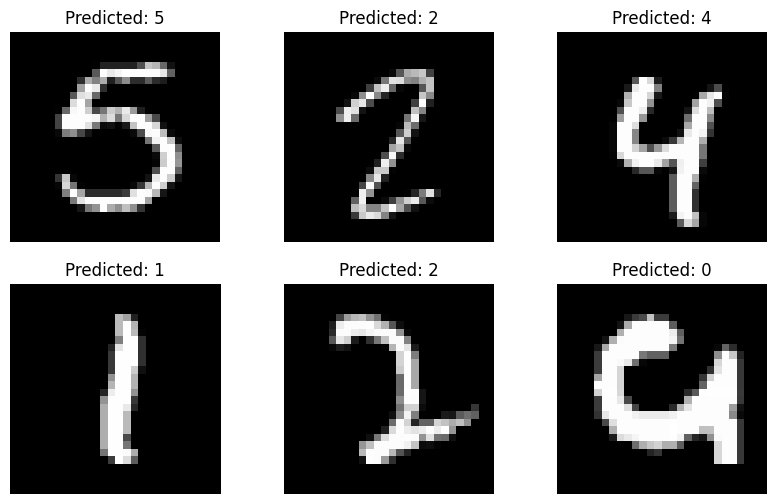

In [ ]:
import matplotlib.pyplot as plt
import random

# Select random indices
random_indices = random.sample(range(len(x_test)), 6)

# Predict probabilities for selected images
predicted_probabilities = model.predict(x_test[random_indices], batch_size=batch_size)
predicted_labels = np.argmax(predicted_probabilities, axis=1)

# Display images with predicted labels
plt.figure(figsize=(10, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_test[idx].reshape((int(np.sqrt(input_size)), int(np.sqrt(input_size)))), cmap='gray')
    plt.title("Predicted: %d" % predicted_labels[i])
    plt.axis('off')

plt.show()
